# Version plus clean parce que l'autre c'est le bordel

# Introduction

Les données sont issues du site du concours KAGGLE; il s’agit du jeu de données " Gym Members Exercise
Dataset" disponible ici: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset.
Ce jeu de données fournit un aperçu détaillé des routines d’exercice, des attributs physiques et des mesures
de la condition physique des membres d’une salle de sport. Il contient 15 variables observées chez 973 individus
fréquentant une salle de sport:
- Age : âge du membre de la salle de sport.
- Gender : Sexe du membre de la salle de sport (qualitative à deux modalités : homme ou femme).
- Weight..kg. : Poids du membre en kilogrammes.
- Height..m. : Taille du membre en mètres.
- Max_BPM : Fréquence cardiaque maximale (battements par minute) pendant les séances d’entraînement.
- Avg_BPM : Fréquence cardiaque moyenne pendant les séances d’entraînement.
- Resting_BPM : Fréquence cardiaque au repos avant l’entraînement.
- Session_Duration..hours. : Durée de chaque séance d’entraînement en heures.
- Calories_Burned : Total des calories brûlées au cours de chaque séance.
- Workout_Type : Type d’entraînement effectué (qualitative à 4 modalités : cardio, musculation, yoga,
HIIT).
- Fat_Percentage (Pourcentage de graisse) : Pourcentage de graisse corporelle du membre.
- Water_Intake..liters. : Consommation quotidienne d’eau pendant les séances d’entraînement.
- Workout_Frequency..days.week. : Nombre de séances d’entraînement par semaine (qualitative à 4
modalités : 2 à 5).
- Experience_Level : Niveau d’expérience (qualitative à 3 modalités : 1 pour débutant à 3 pour expert).
- BMI : Indice de masse corporelle (IMC), calculé à partir de la taille et du poids.

  
Dans ce projet, on souhaite dans un premier temps, prédire la variable **Calories_Burned** à partir de toutes
les autres variables, et dans un second temps, prédire la variable **Experience_Level** à partir de toutes les autres
variables (dont Calories_Burned).


In [121]:
# Chargement des librairies nécessaires
# ça serait bien de dire plus ou moins à quoi serve chaque librairie
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(MASS) #Pour la méthode BoxCox
library(caret)  
library(vcd)

# I) Statistiques descriptives / Exploration des variables

## 1) Prise en charge des données : Vérification de la nature des différentes variables et leur encodage. Convertion des variables qualitatives.

In [122]:
# Lecture des données
path <- ""
gym <- read.csv("gym_members_exercise_tracking.csv", header = TRUE)
# Premières lignes du jeu de données
head(gym)
# Vérification du contenu
summary(gym)

,Age,Gender,Weight..kg.,Height..m.,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration..hours.,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake..liters.,Workout_Frequency..days.week.,Experience_Level,BMI
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
2,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
3,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
4,25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
5,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
6,56,Female,58.0,1.68,168,156,74,1.59,1116,HIIT,15.5,2.7,5,3,20.55


      Age           Gender           Weight..kg.       Height..m.   
 Min.   :18.00   Length:973         Min.   : 40.00   Min.   :1.500  
 1st Qu.:28.00   Class :character   1st Qu.: 58.10   1st Qu.:1.620  
 Median :40.00   Mode  :character   Median : 70.00   Median :1.710  
 Mean   :38.68                      Mean   : 73.85   Mean   :1.723  
 3rd Qu.:49.00                      3rd Qu.: 86.00   3rd Qu.:1.800  
 Max.   :59.00                      Max.   :129.90   Max.   :2.000  
    Max_BPM         Avg_BPM       Resting_BPM    Session_Duration..hours.
 Min.   :160.0   Min.   :120.0   Min.   :50.00   Min.   :0.500           
 1st Qu.:170.0   1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040           
 Median :180.0   Median :143.0   Median :62.00   Median :1.260           
 Mean   :179.9   Mean   :143.8   Mean   :62.22   Mean   :1.256           
 3rd Qu.:190.0   3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460           
 Max.   :199.0   Max.   :169.0   Max.   :74.00   Max.   :2.000           

On remarque que il y a plusieurs variables qualitatives : Gender, Workout_Type.
De même certaines variables ne prennent pas beaucoup de valeurs différentes donc il est intérréssant de les convertir en facteur : Experience_Level, Workout_Frequency..days.week.

Les autres variables sont des variables quantitatives que l'on transformera plus tard. 

In [123]:
# Changement du type des variables qualitatives en facteur
gym[, "Gender"] <- as.factor(gym[, "Gender"])
gym[, "Workout_Type"] <- as.factor(gym[, "Workout_Type"])
#On décide de mettre les 2 variables suivantes sous forme qualitatives car elles prennent seulement un certains nombres de valeur.
gym[, "Experience_Level"] <- as.factor(gym[, "Experience_Level"])
gym[, "Workout_Frequency..days.week."] <- as.factor(gym[, "Workout_Frequency..days.week."])

In [124]:
# Vérification dans le summary
summary(gym)

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Session_Duration..hours. Calories_Burned 
 Min.   :120.0   Min.   :50.00   Min.   :0.500            Min.   : 303.0  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0  
 Median :143.0   Median :62.00   Median :1.260            Median : 893.0  
 Mean   :143.8   Mean   :62.22   Mean   :1.256            Mean   : 905.4  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0

## 2) Exploration par une analyse descriptive unidimensionnelle des données.

#### 2.1) Données quantitatives 

Il est nécessaire d'étudier la distribution des différentes variables et de notez la symétrie ou non de celles-ci.

In [125]:
#On pourrait aussi rajouter quelques histogrammes ou boxplots

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


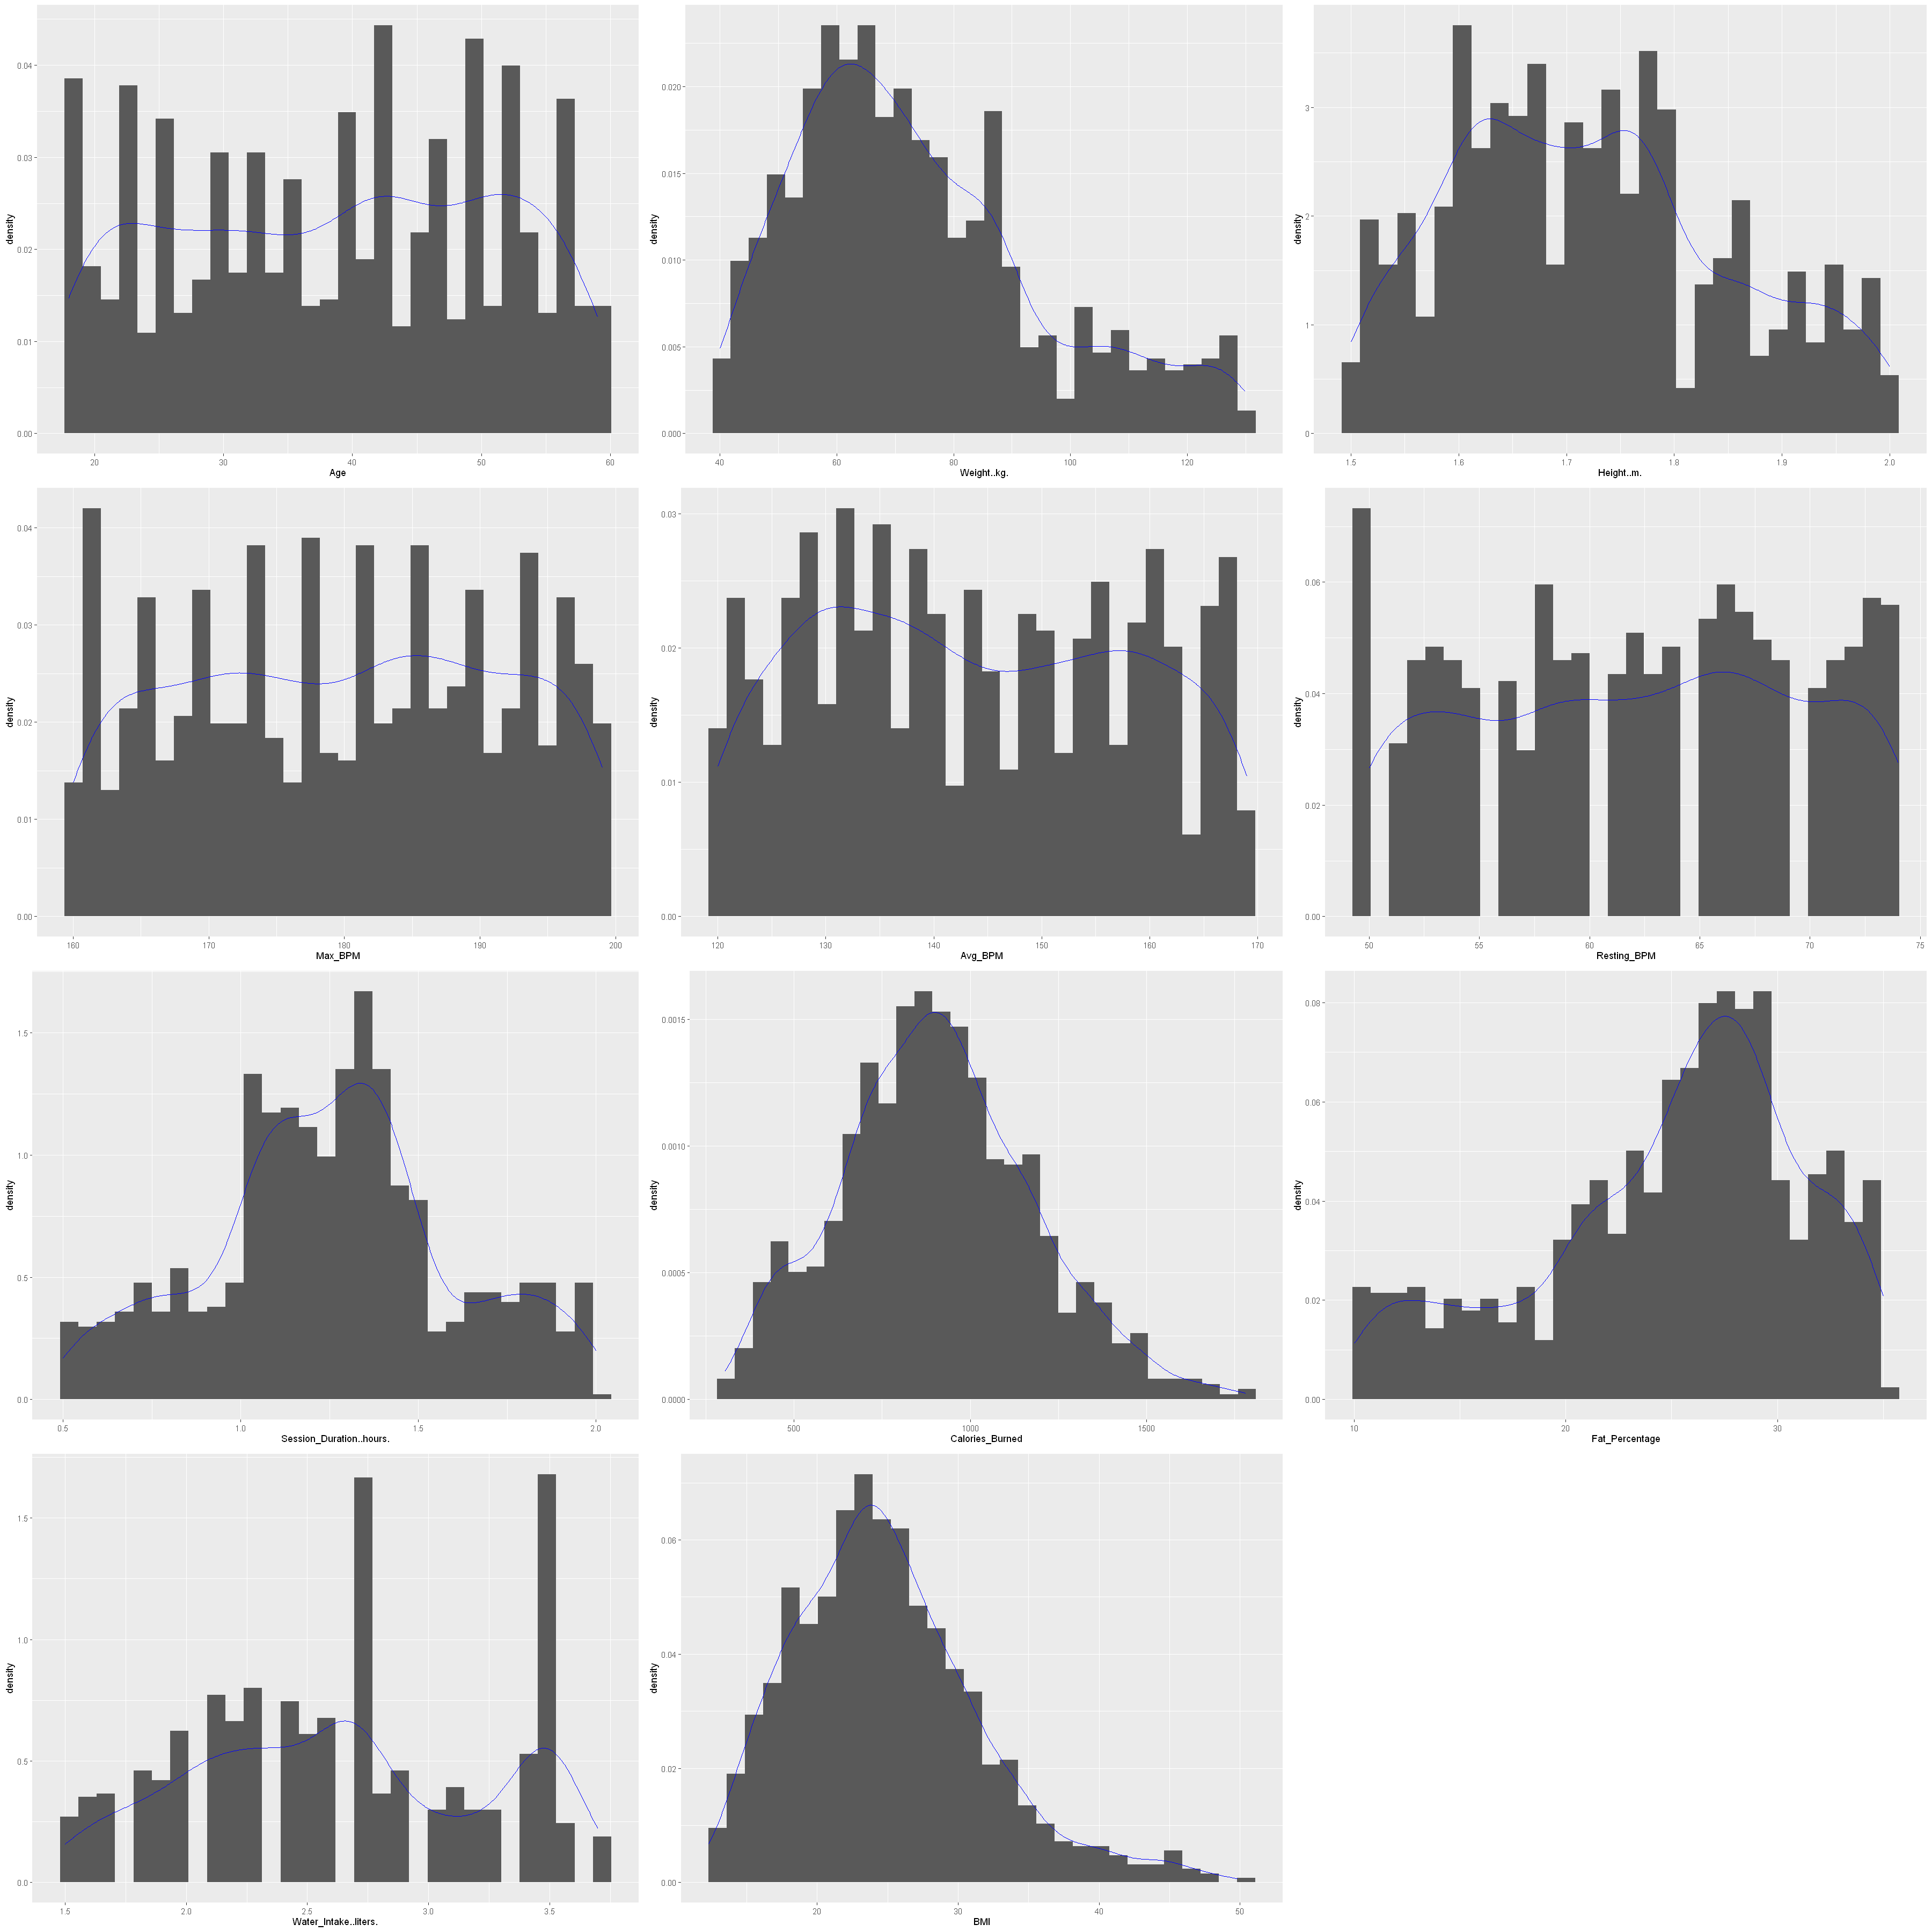

In [126]:
options(repr.plot.width=30, repr.plot.height=30)
g1<-ggplot(gym,aes(x=Age))+geom_histogram(aes(y=after_stat(density)))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(gym,aes(x=Weight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(gym,aes(x=Height..m.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(gym,aes(x=Max_BPM))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(gym,aes(x=Avg_BPM))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(gym,aes(x=Resting_BPM))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(gym,aes(x=Session_Duration..hours.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(gym,aes(x=Calories_Burned))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g9<-ggplot(gym,aes(x=Fat_Percentage))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g10<-ggplot(gym,aes(x=Water_Intake..liters.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g11<-ggplot(gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 

grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,ncol=3)

#Les variables sont quantitatives et non symétriques sauf calories_burned et BMI à peu près.

Les variables sont quantitatives et non symétriques sauf calories_burned et BMI à peu près. On va donc passer a une transformation des variables pour rendre certaines distributions plus symétriques et ainsi plus "gaussiennes". C'est nécessaire pour certaines méthodes à venir de modélisation (linéaires), pas pour toutes (arbres).

Dans notre cas, les variables ayant une ressemblance gaussienne sont calories_burned, BMI, Weight..kg. et Fat_Percentage.
On va donc essayer de les centrer.

#### 2.1.1) Transformation des variables / Attention, comme on va prédire Calories_Burned, ce n'est pas intéressant de le transformer donc on ne le transforme pas.

##### a) BMI

Tout d'abord, on va s'intéresser à BMI car elle est plus ou moins symétrique et on se dit qu'en appliquant une certaine fonction bien choisie, on peut la rendre symétrique.
En s'inspirant du TP de base, on remarque que l'on aplique + des log lorsqu'il y a un gros pic au début (pour "contrer le log").
Ici, on ne remarque pas de pic particulier donc on va se contenter d'appliquer les 2 fonctions vues en TP : sqrt et log puis comparer les résultats.

In [127]:
gym[, "LBMI"] <- log(gym[, "BMI"])
gym[, "SBMI"] <- sqrt(gym[, "BMI"])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


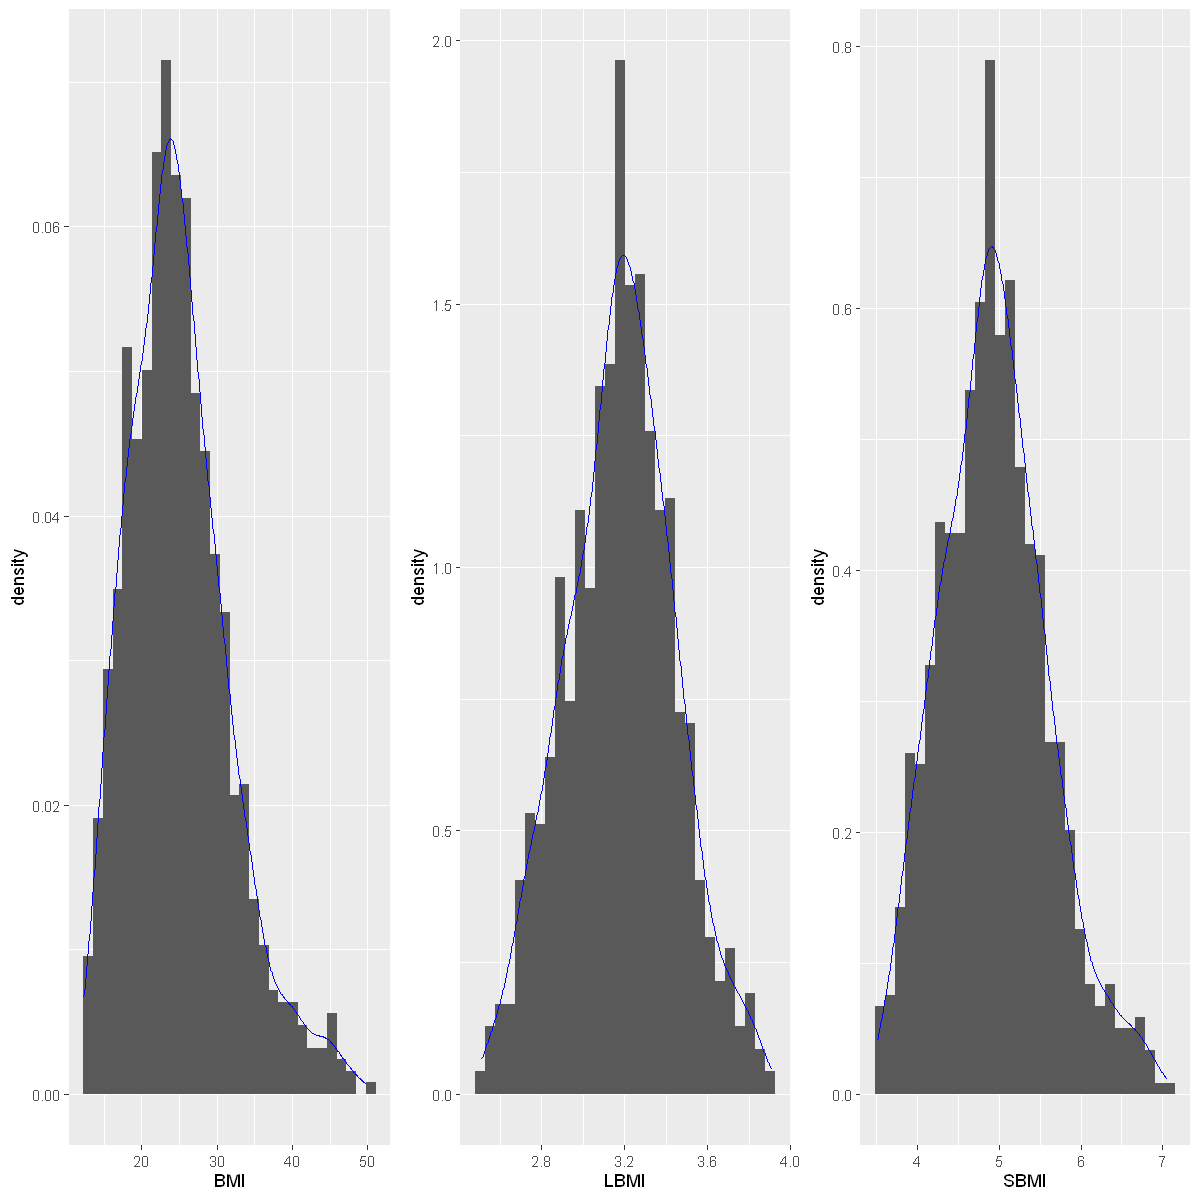

In [128]:
options(repr.plot.width=10, repr.plot.height=10)
g1<-ggplot(gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(gym,aes(x=LBMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(gym,aes(x=SBMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
grid.arrange(g1, g2, g3, ncol=3)

Pour l'instant, on part sur le LBMI (log) car c'est celle qu'on trouve la plus centrée

Maintenant, est ce qu'il faut faire le même raisonnement pour chaque variables ou uniquement celle pour lesquelles on estime que c'est déjà à peu près symétrique ? => non, tout ce qui est plus ou moins uniforme, ça sert à rien d'essayer, ça restera nul

Est ce qu'il y a d'autres fonctions à utiliser que sqrt et log ? => oui 

##### b) Weight..kg

[1] -0.3434343


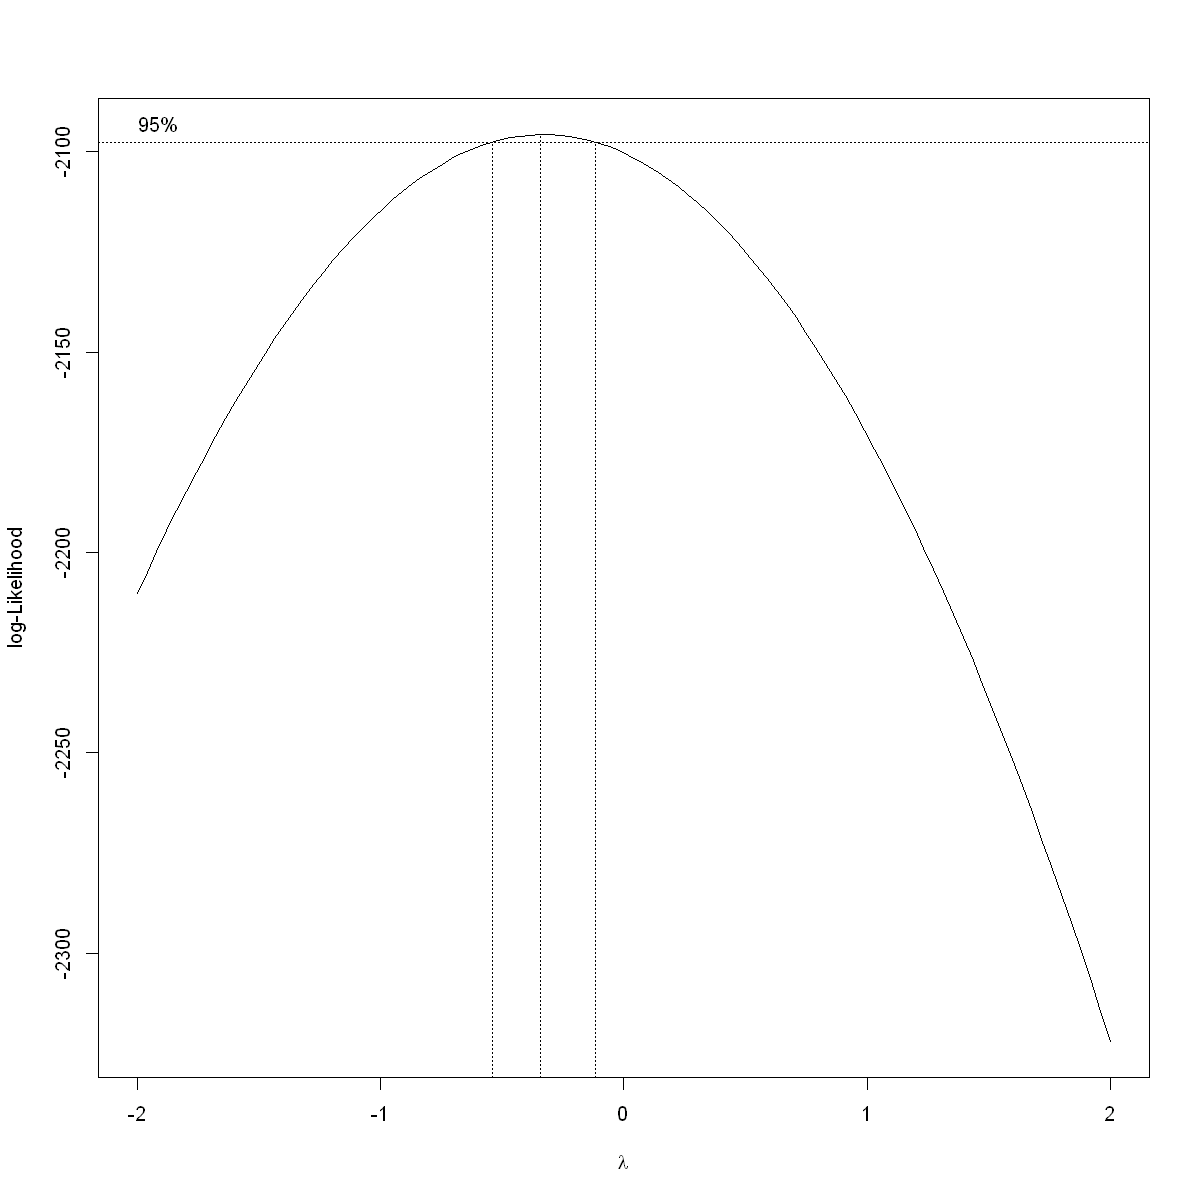

In [129]:
gym[, "LWeight..kg."] <- log(gym[, "Weight..kg."])
gym[, "SWeight..kg."] <- sqrt(gym[, "Weight..kg."])

#On essaye d'appliquer 2 autres fonctions:

gym[, "AWeight..kg."] <- atan(gym[, "Weight..kg."]) #arctan

#Méthode Box Cox => on optimise la valeur de lambda pour rendre la distribution la plus normale possible. Fonctionne pour des valeurs strictement positives (le cas ici)
lambda <- boxcox(lm(Weight..kg. ~ 1, data = gym), lambda = seq(-2, 2, by = 0.1))$x[which.max(boxcox(lm(Weight..kg. ~ 1, data = gym), lambda = seq(-2, 2, by = 0.1))$y)]
if (lambda == 0) {
  gym[, "BWeight..kg."] <- log(gym[, "Weight..kg."])
} else {
  gym[, "BWeight..kg."] <- (gym[, "Weight..kg."]^lambda - 1) / lambda
}
print(lambda)

Ici, le lambda optimal pour la méthode Box Cox est : -0.3434343

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


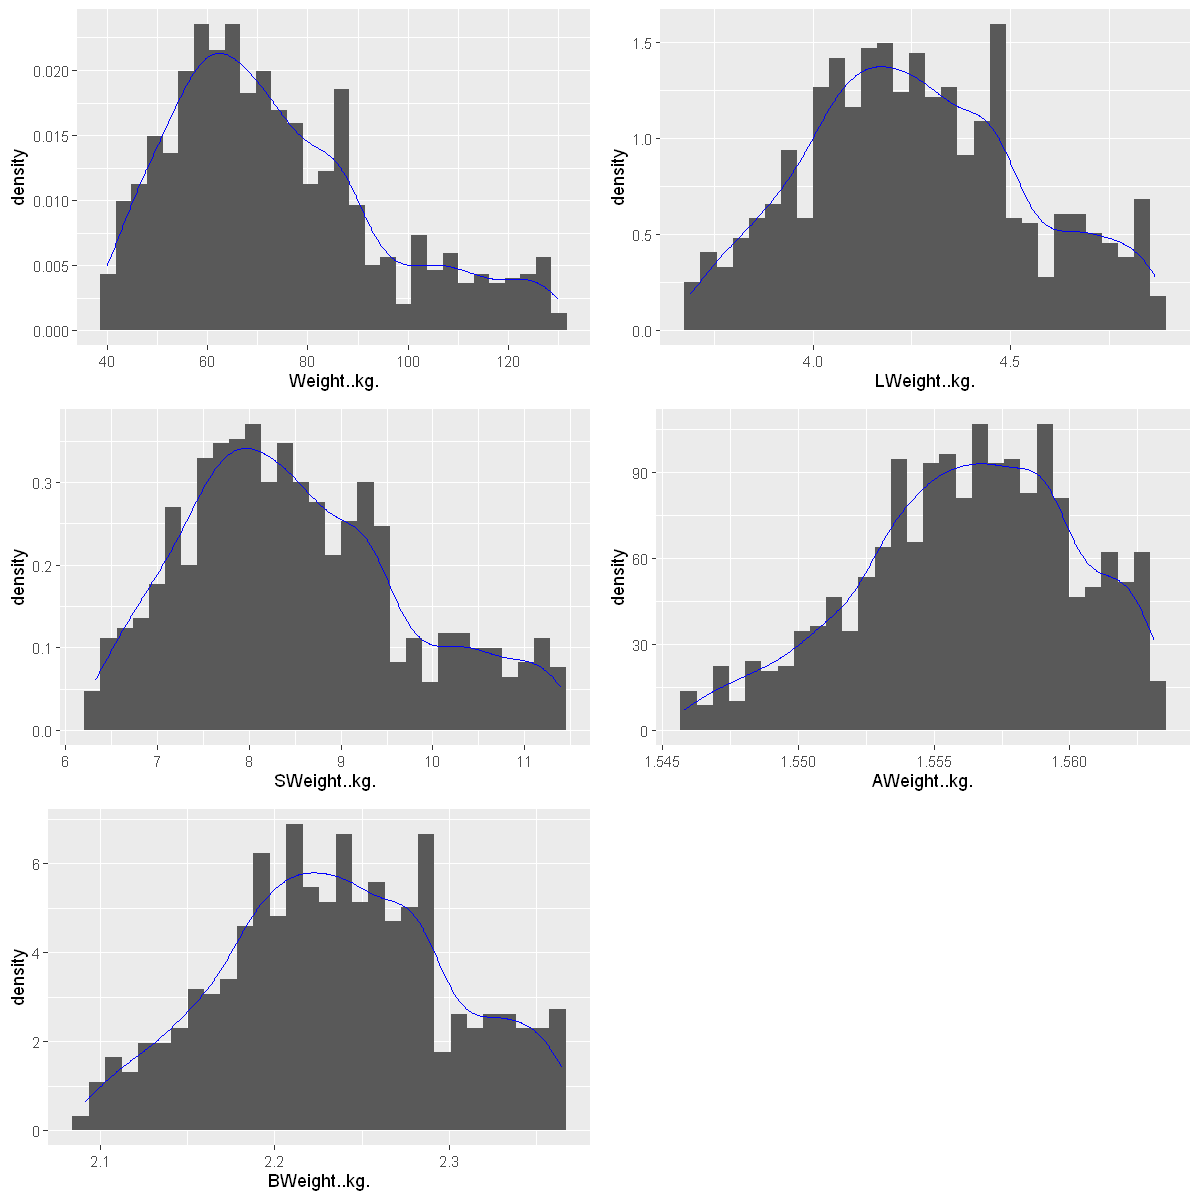

In [130]:
options(repr.plot.width=10, repr.plot.height=10)
g1<-ggplot(gym,aes(x=Weight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(gym,aes(x=LWeight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") # => le plus correct
g3<-ggplot(gym,aes(x=SWeight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(gym,aes(x=AWeight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(gym,aes(x=BWeight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
grid.arrange(g1, g2, g3, g4, g5, ncol=2)

Tout de même, la fonction log reste celle qui rend la distribution la plus gaussienne => on garde LWeight

##### c) Fat_Percentage

Pour la dernière variable Fat_Percentage, les transformations testées n'ont pas été concluantes. On la gardera tel quel. 

#### 2.1.2) Suppression des variables qui ont été transformées

In [131]:
gym <- gym[ , -which(names(gym) == "BMI")]
gym <- gym[ , -which(names(gym) == "SBMI")]
gym <- gym[ , -which(names(gym) == "Weight..kg." )]
gym <- gym[ , -which(names(gym) == "SWeight..kg." )]
gym <- gym[ , -which(names(gym) == "AWeight..kg." )]
gym <- gym[ , -which(names(gym) == "BWeight..kg." )]

In [132]:
summary(gym)

      Age           Gender      Height..m.       Max_BPM         Avg_BPM     
 Min.   :18.00   Female:462   Min.   :1.500   Min.   :160.0   Min.   :120.0  
 1st Qu.:28.00   Male  :511   1st Qu.:1.620   1st Qu.:170.0   1st Qu.:131.0  
 Median :40.00                Median :1.710   Median :180.0   Median :143.0  
 Mean   :38.68                Mean   :1.723   Mean   :179.9   Mean   :143.8  
 3rd Qu.:49.00                3rd Qu.:1.800   3rd Qu.:190.0   3rd Qu.:156.0  
 Max.   :59.00                Max.   :2.000   Max.   :199.0   Max.   :169.0  
  Resting_BPM    Session_Duration..hours. Calories_Burned    Workout_Type
 Min.   :50.00   Min.   :0.500            Min.   : 303.0   Cardio  :255  
 1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0   HIIT    :221  
 Median :62.00   Median :1.260            Median : 893.0   Strength:258  
 Mean   :62.22   Mean   :1.256            Mean   : 905.4   Yoga    :239  
 3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0                 
 Max.   :7

#### 2.1.3) Vérification des outliers

Maintenant que nos variables ont été transformé, on veut s'assurer qu'il n'y pas d'outliers importants avant de pourvoir passer à la suite du projet. Pour cela, on va afficher des boxplots pour chacune de nos variables quantitatives. Etant donné que nos variables quantitatives ont des valeurs très différentes, nous allons les normaliser pour rendre l'affichage des boxplot plus propre (sinon c'est illisible), mais cela ne change rien aux outliers.

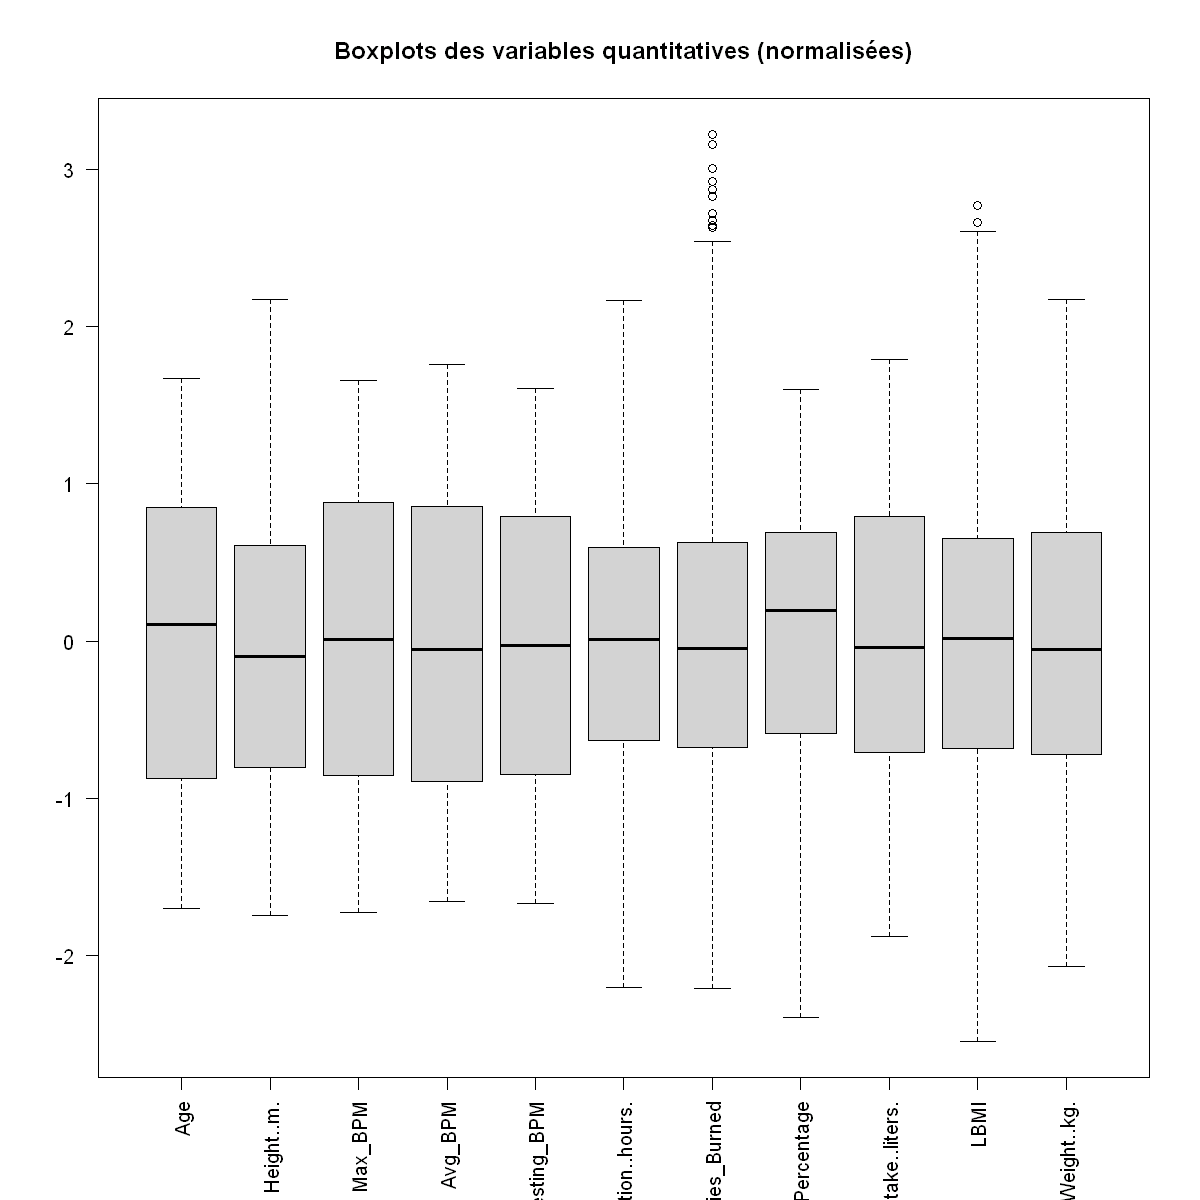

In [133]:
#Sélection des variables quanti i.e.: numeric
quanti_data <- gym[, sapply(gym, is.numeric)]

# Normalisation (centrage et réduction)
quanti_data_scaled <- scale(quanti_data)

# Boxplot des données normalisées
boxplot(quanti_data_scaled, main = "Boxplots des variables quantitatives (normalisées)", las = 2)


Aucun outliers excepté pour Calories_Burned et LBMI.  Cependant, après une inspection plus approfondie des valeurs extrêmes, nous constatons qu'elles ne sont pas aberrantes et ne risquent pas de fausser les résultats. Par conséquent, nous avons décidé de les conserver dans l'analyse.

#### 2.2) Données qualitatives 

In [134]:
# Sélection unique des variables qualitatives
quali_vars <- which(sapply(gym, function(x) is.factor(x) || is.character(x)))

# Affichage des tables de fréquence sans doublons
for (var in names(gym)[quali_vars]) {
  cat("\n---", var, "---\n")
  print(table(gym[[var]]))
}


--- Gender ---

Female   Male 
   462    511 

--- Workout_Type ---

  Cardio     HIIT Strength     Yoga 
     255      221      258      239 

--- Workout_Frequency..days.week. ---

  2   3   4   5 
197 368 306 102 

--- Experience_Level ---

  1   2   3 
376 406 191 


Pas de valeurs aberrantes ou inutiles.

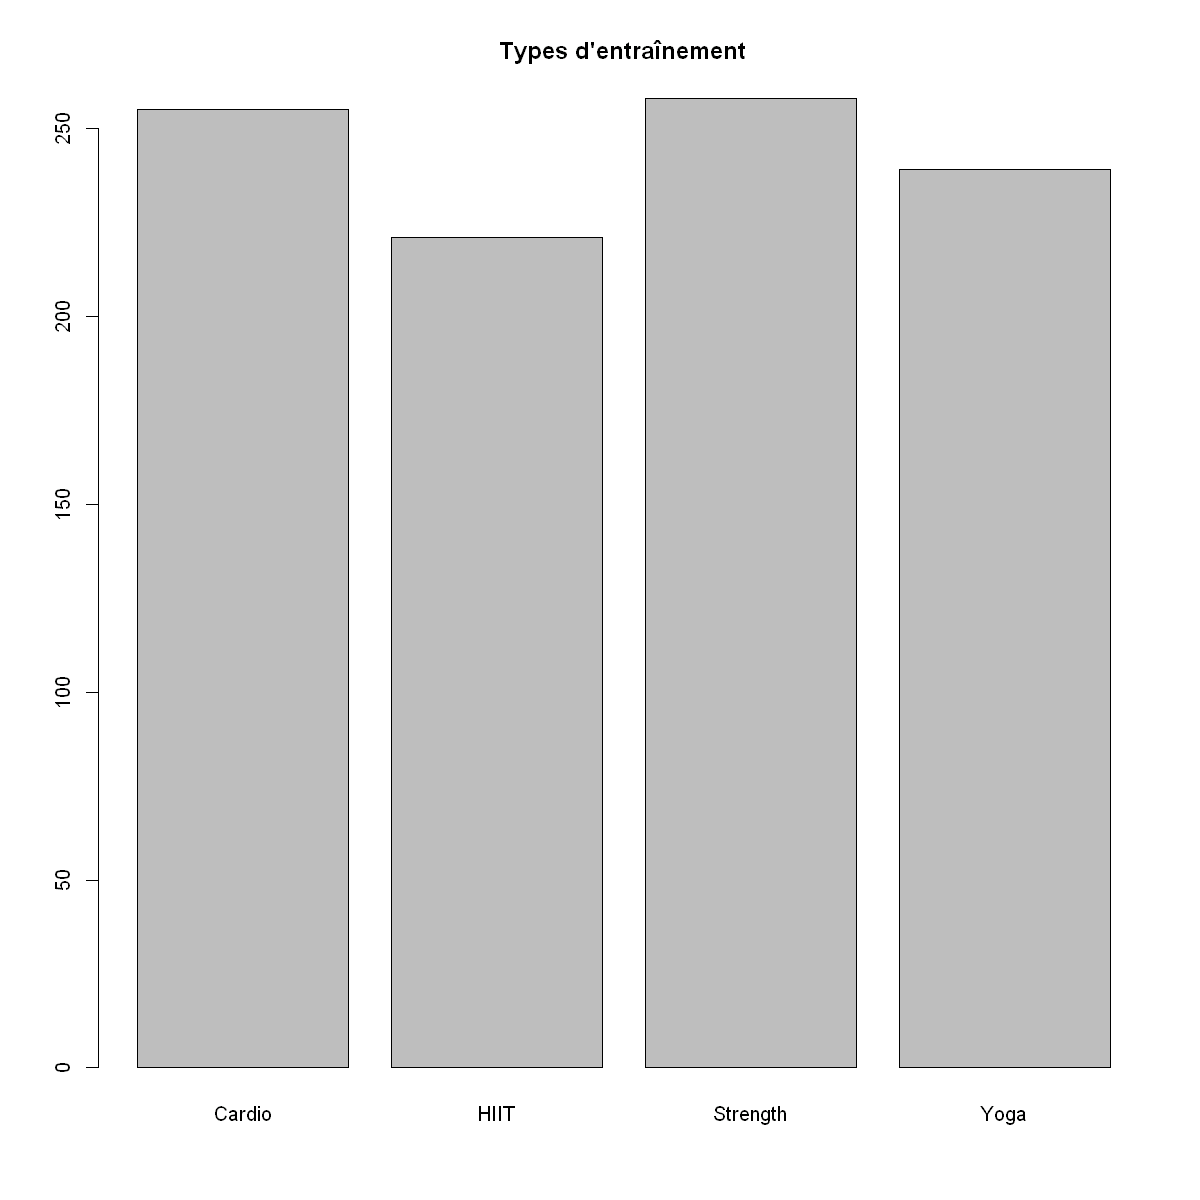

In [135]:
#On peut aussi faire des barplots
barplot(table(gym$Workout_Type), main = "Types d'entraînement")

## 3) Analyse descriptive bidimensionnelle

Utilisation des techniques de visualisation: par exemple les nuages de points (scatterplot), des graphes des correlations, des boîtes à moustaches parallèles, 
mosaicplot..

### 3.1) Comparaison quanti / quanti 

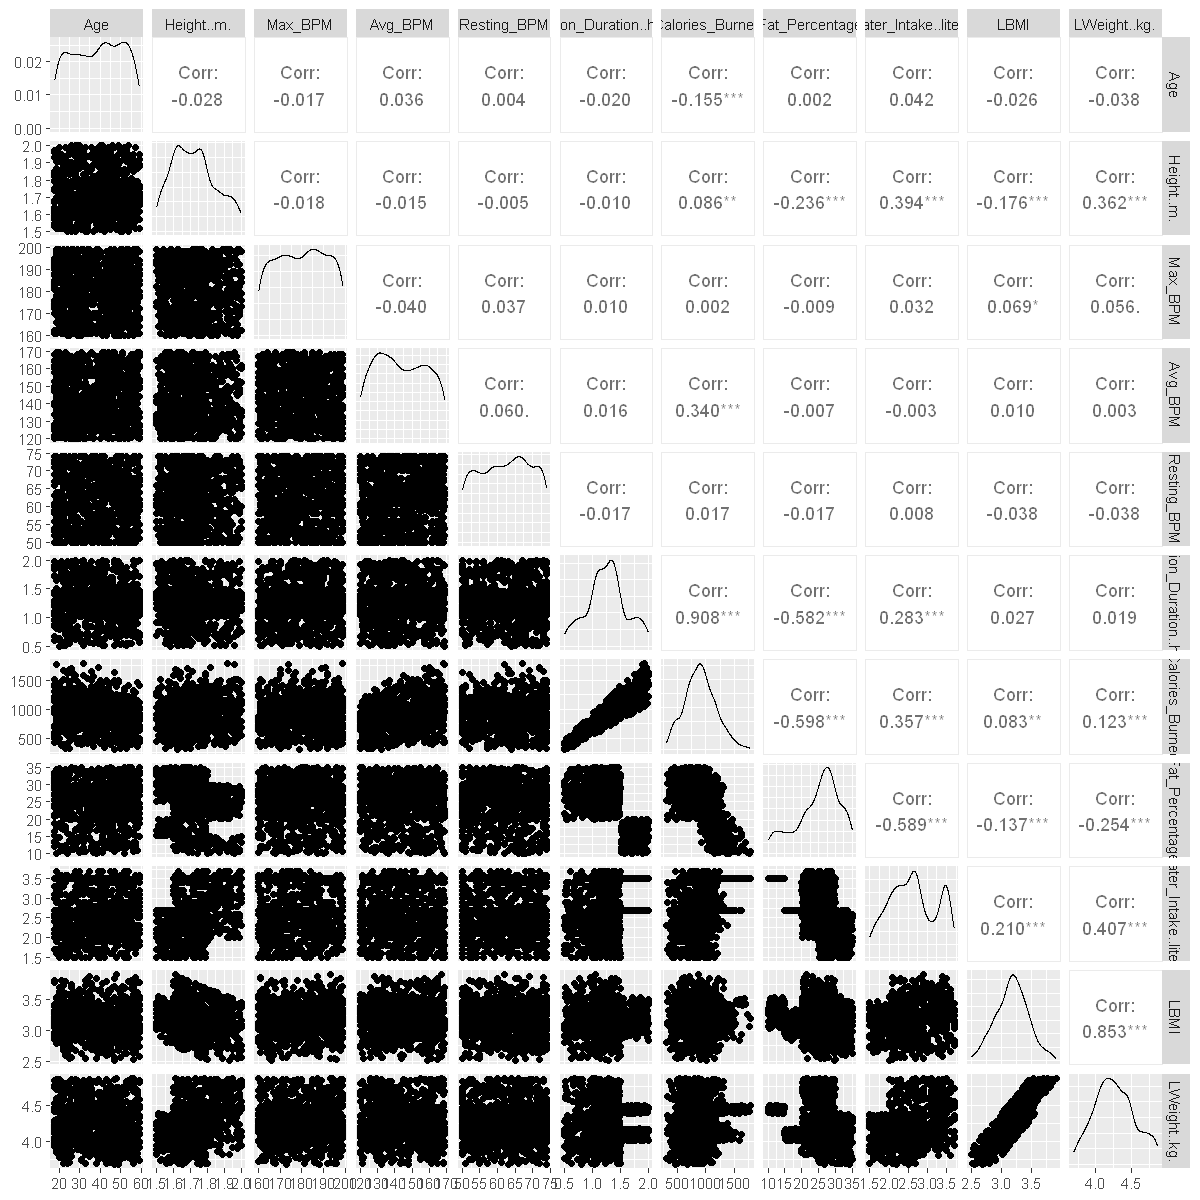

In [136]:
ggpairs(gym[, c(1,3:8,10,11,14,15)])

On voit que la durée de la session est correlée au  nombre de calories brulées. De plus, sans surprise, l'IMC est correlé au poids et à la taille du membre. => pourquoi taille ? la corr est seulement de -0.17

Il y a aussi une (plus légère) corrélation négative entre le pourcentage de gresse corporelle d'un membre et :
- la durée de la session => les personnes en difficulté physiques peuvent avoir du mal à faire de plus longues séances
- nbr de calories brulées => par conséquent, elles ont du mal à bruler des calories
- consommation quotidienne d’eau pendant les séances d’entraînement => plus on s'entraîne et plus on s'hydrate (et inversement)


On va vérifier ces corrélations avec des scatter plot (qui sont déjà présents dans le ggpairs mais cela permet de mieux visualiser en les affichant en plus grand) :

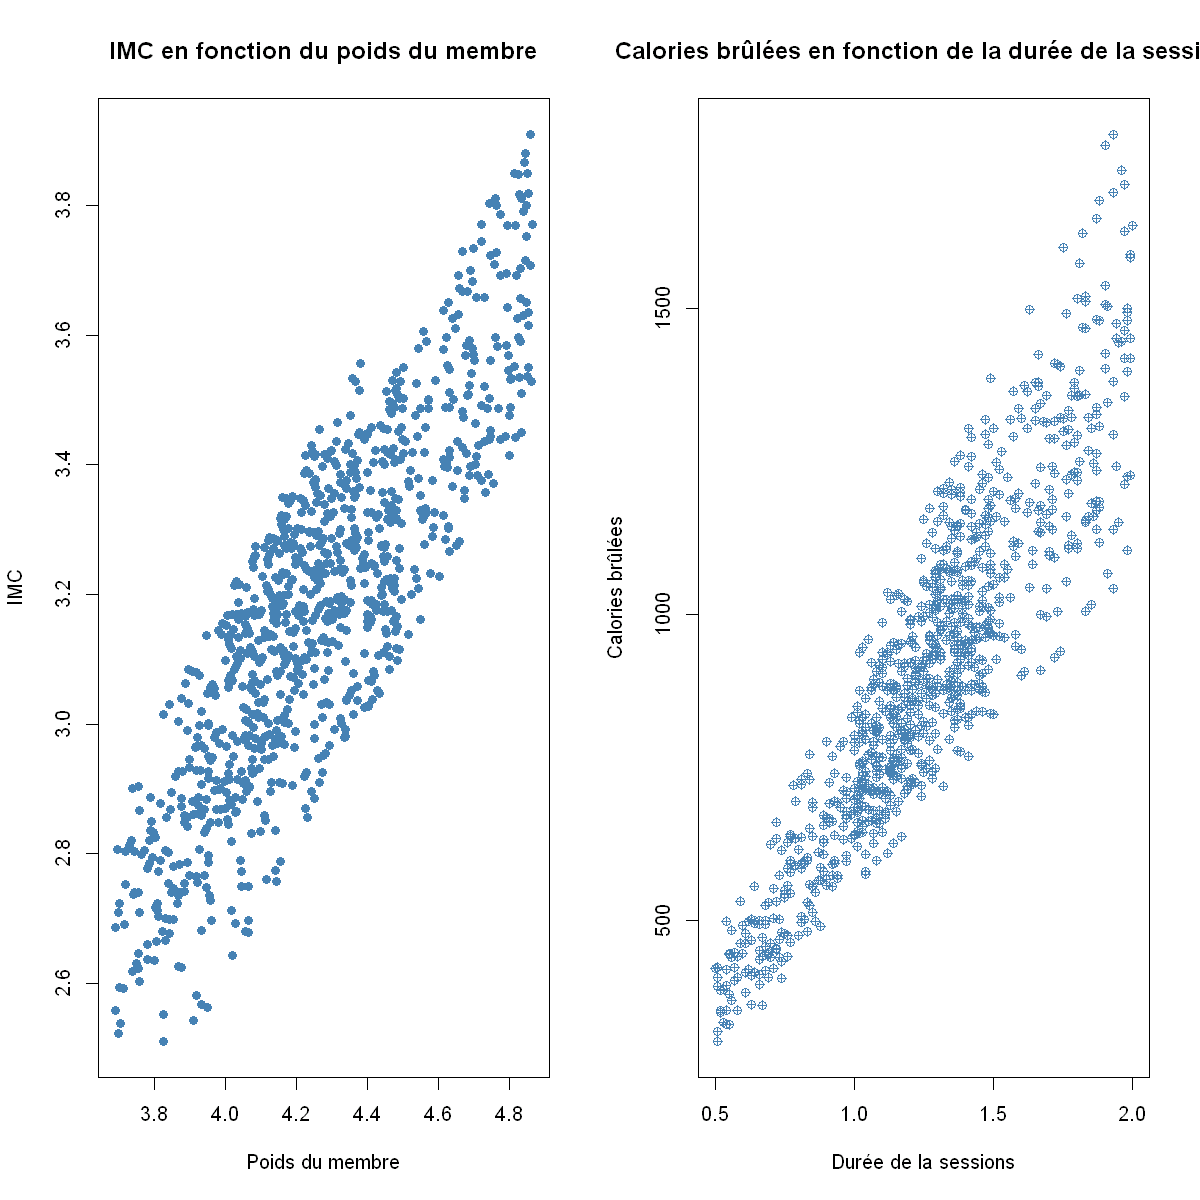

In [137]:
par(mfrow = c(1, 2))  # 1 ligne, 2 colonnes

#1er plot
plot(gym$LWeight..kg., gym$LBMI, 
     main = "IMC en fonction du poids du membre",
     xlab = "Poids du membre", ylab = "IMC",
     pch = 19, col = "steelblue")

#2nd plot 
plot(gym$Session_Duration..hours., gym$Calories_Burned,
     main = "Calories brûlées en fonction de la durée de la session",
     xlab = "Durée de la sessions", ylab = "Calories brûlées",
     pch = 10, col = "steelblue")

Cela confirme bien nos hypothèses de corrélations positives plutôt fortes

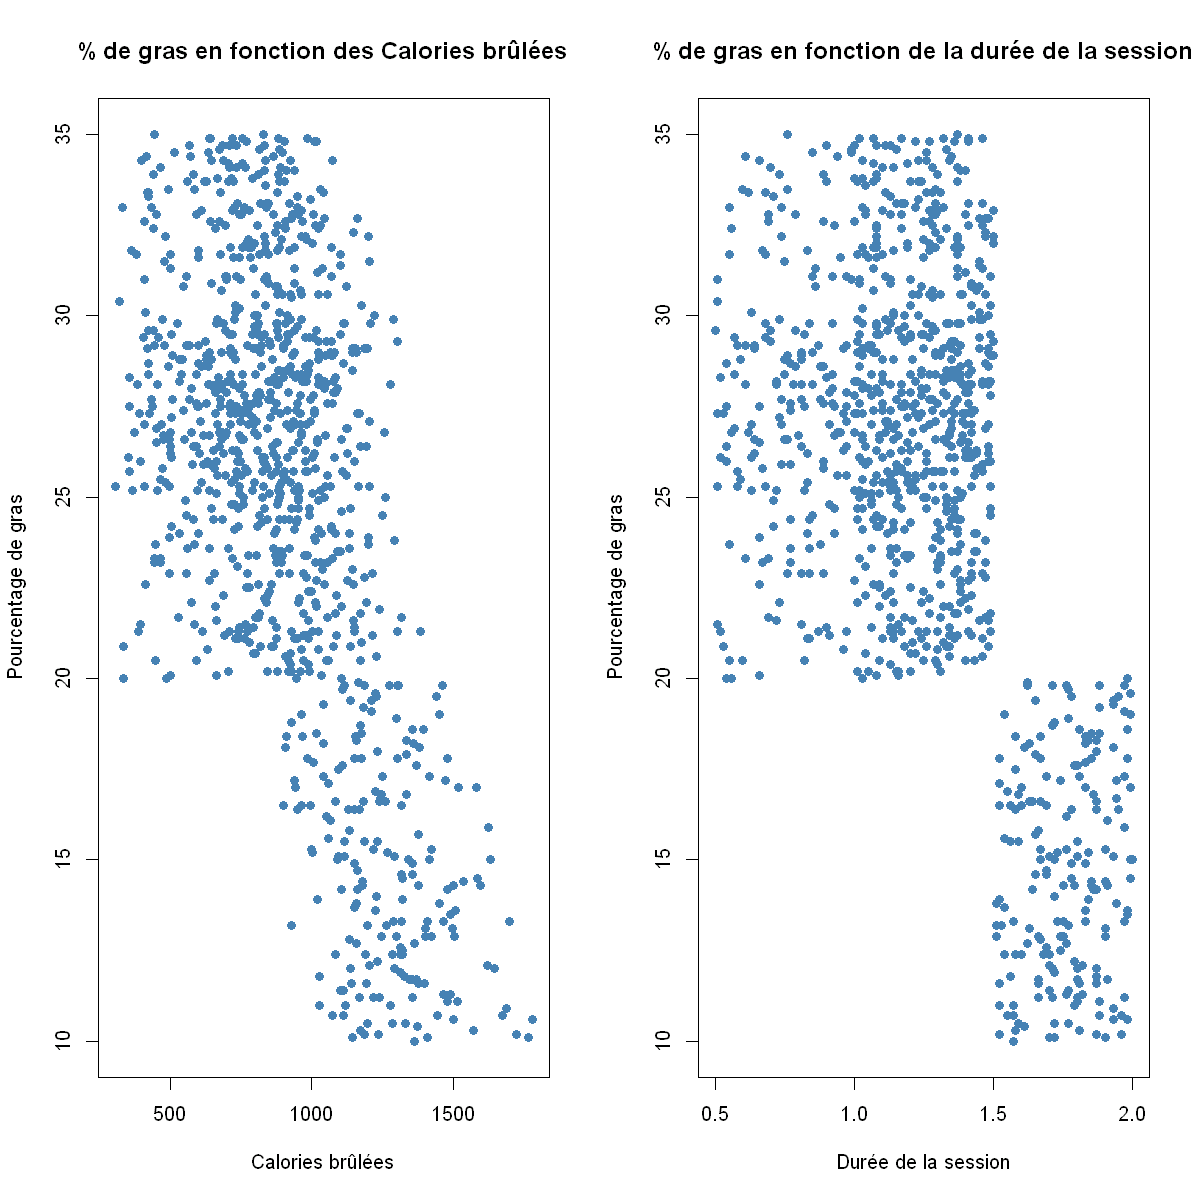

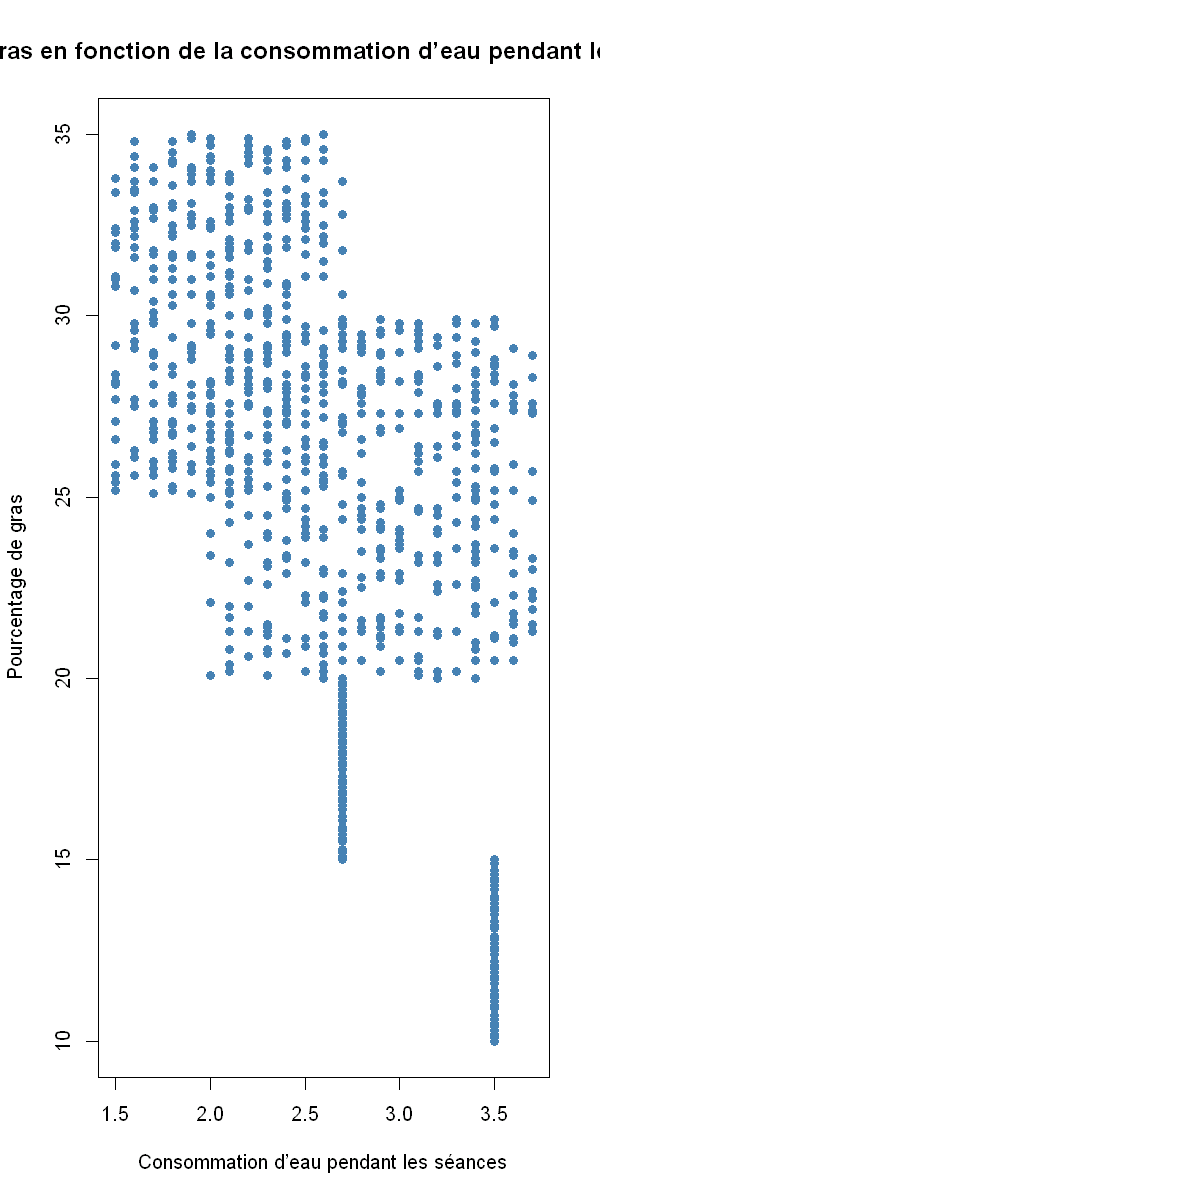

In [138]:
par(mfrow = c(1,2))  # 1 ligne, 2 colonnes

plot(gym$Calories_Burned, gym$Fat_Percentage, 
     main = "% de gras en fonction des Calories brûlées",
     xlab = "Calories brûlées", ylab = "Pourcentage de gras",
     pch = 19, col = "steelblue")

plot(gym$Session_Duration..hours., gym$Fat_Percentage,
     main = "% de gras en fonction de la durée de la session",
     xlab = "Durée de la session", ylab = "Pourcentage de gras",
     pch = 19, col = "steelblue")

plot(gym$Water_Intake..liters., gym$Fat_Percentage,
     main = "% de gras en fonction de la consommation d’eau pendant les séances",
     xlab = "Consommation d’eau pendant les séances", ylab = "Pourcentage de gras",
     pch = 19, col = "steelblue")

On confirme aussi les hypothèses de corrélations négatives moins fortes que les corrélations précédentes.

### 3.2 Comparaison quali / quali 

On effectue tout d'abord quelques mosaic plot pour observer la dépendance entre les variables qualitatives 2 à 2

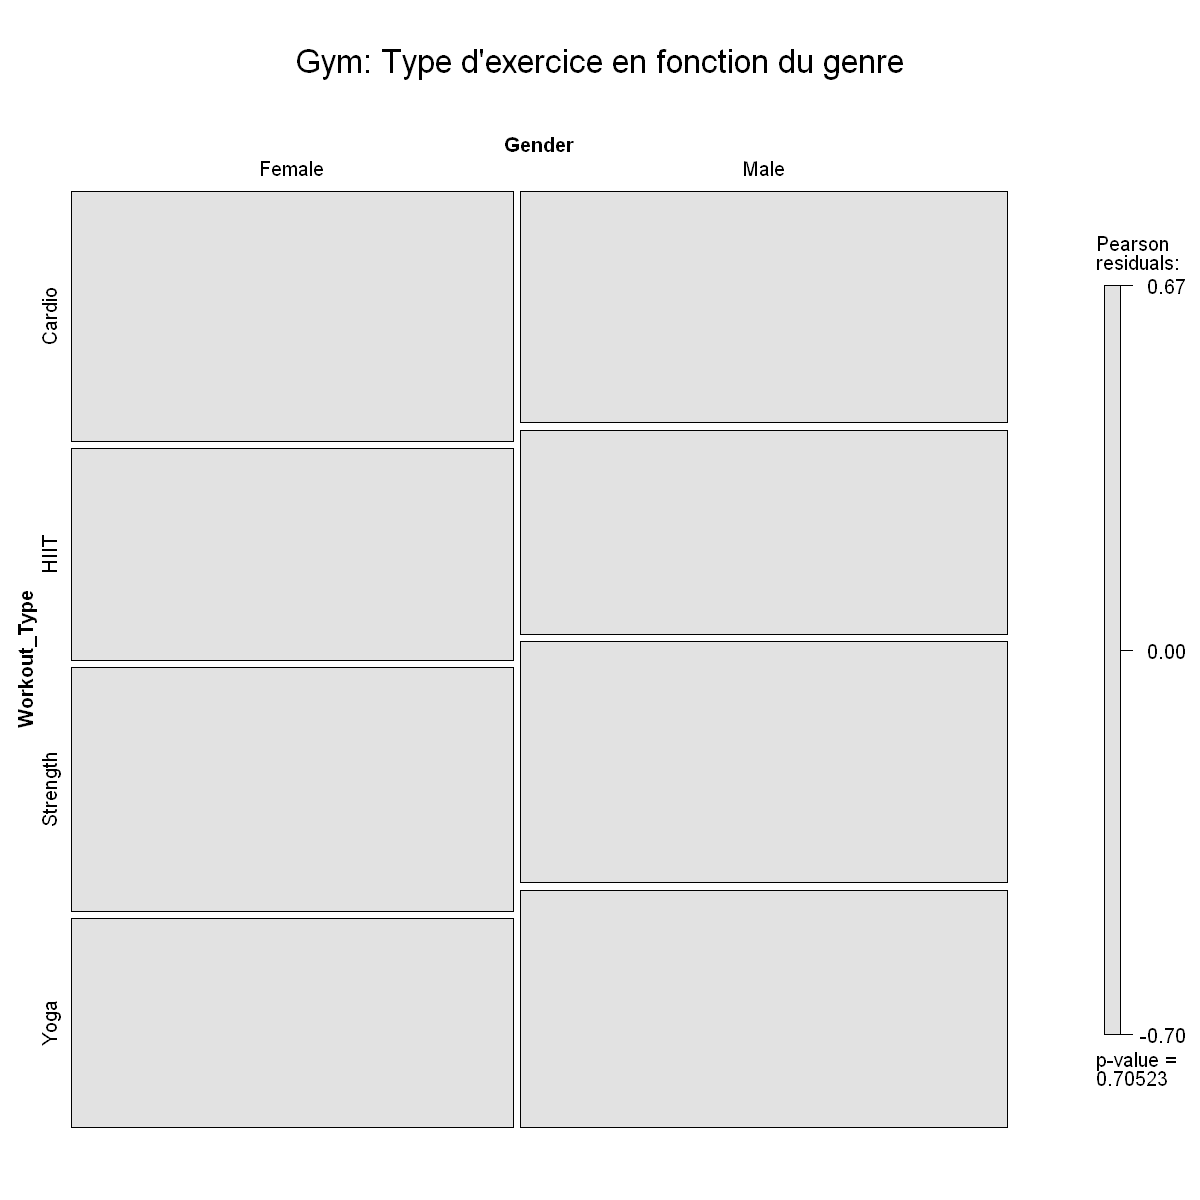

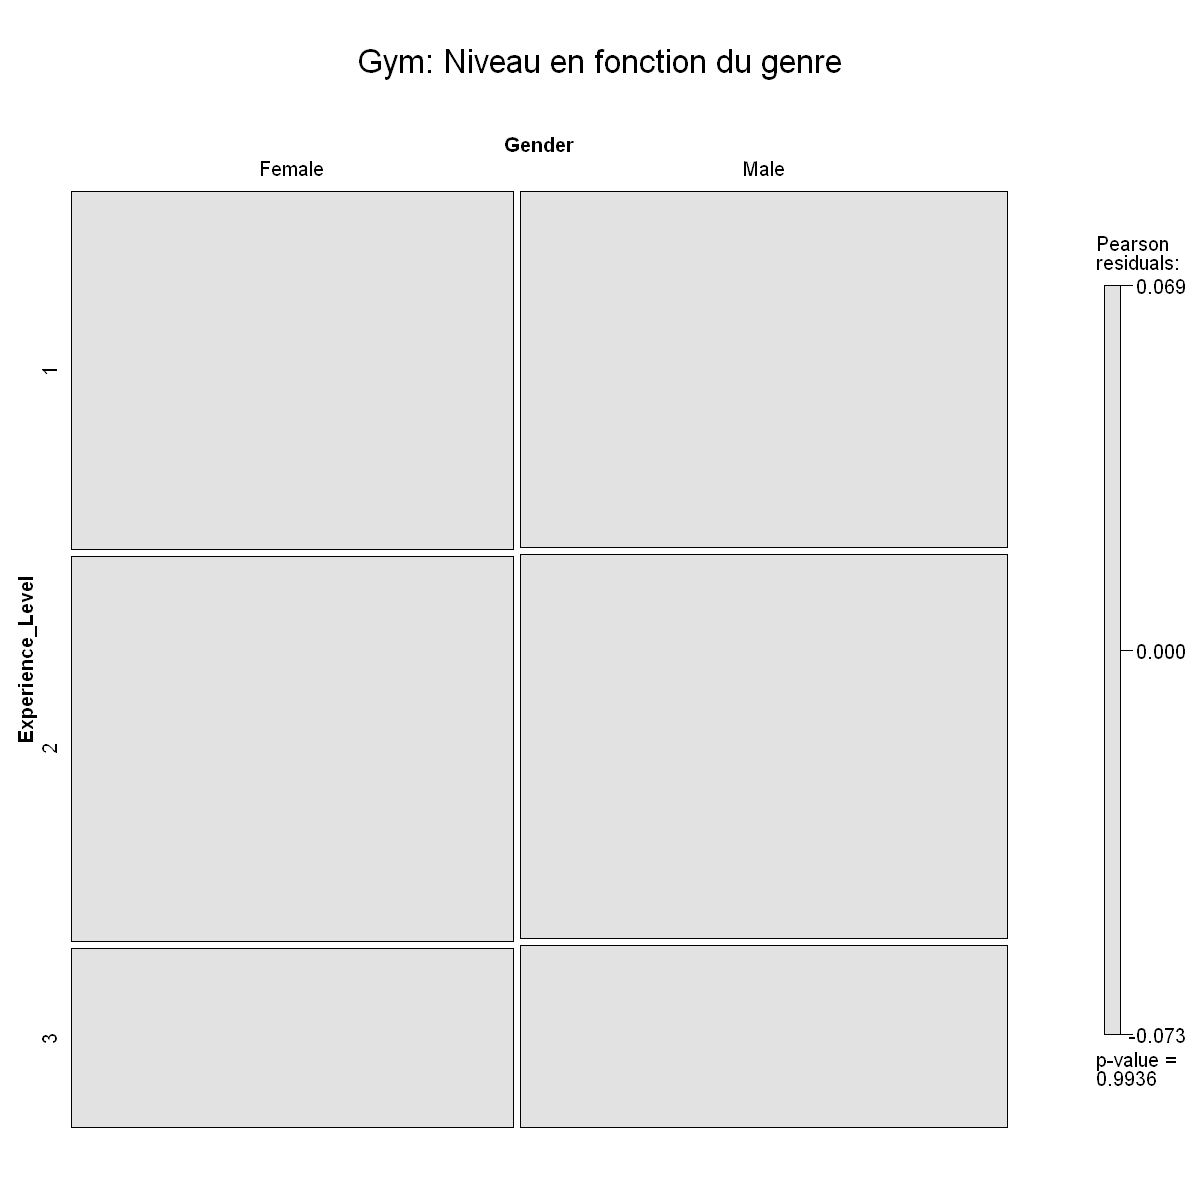

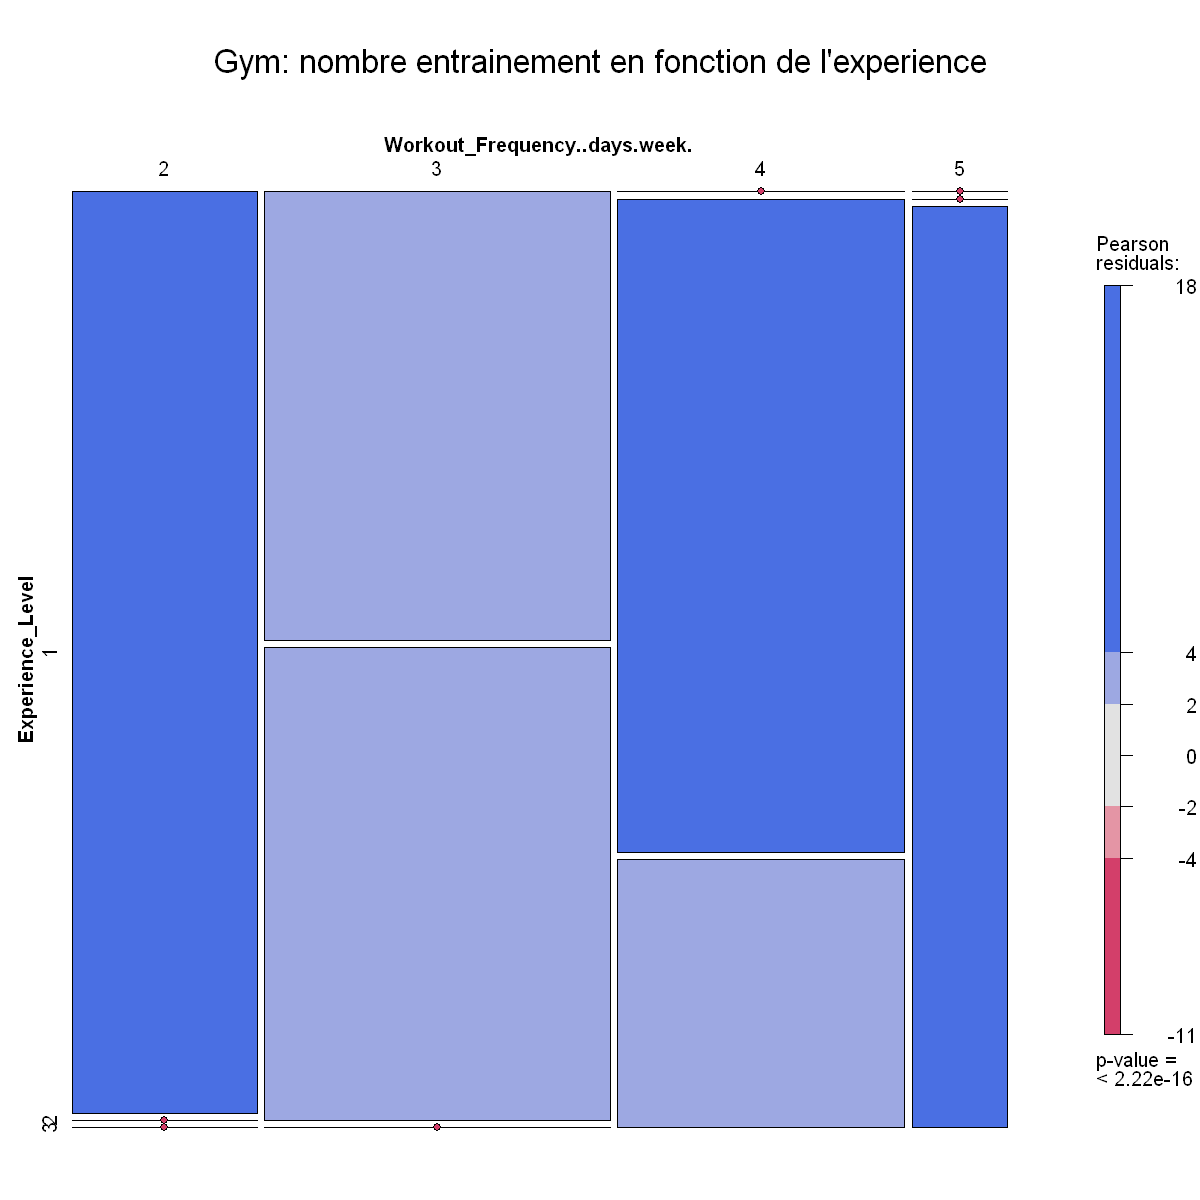

In [139]:
mosaic( xtabs(~Gender + Workout_Type, data = gym), shade = TRUE, ,
            split_vertical = TRUE,
            main="Gym: Type d'exercice en fonction du genre")

mosaic( xtabs(~Gender + Experience_Level, data = gym),  shade = TRUE, ,
            split_vertical = TRUE,
            main="Gym: Niveau en fonction du genre")
mosaic( xtabs(~Workout_Frequency..days.week. + Experience_Level, data = gym),  shade = TRUE, ,
            split_vertical = TRUE,
            main="Gym: nombre entrainement en fonction de l'experience")

Ici, il y a 3 différents cas qui correspondent à 3 niveaux de p-valeurs : 
1) Quand on compare le niveau d'expérience selon le genre, on remarque qu'il n'y a pas du tout de dépendance entre ces 2 variables car il y a quasiment aucune différence selon le genre. On le confirme avec une p-valeur presque égale à 1. 
2) Quand on compare le type de d'entrînement effectué selon le genre, il n'y a toujours pas de dépendance forte mais il y a quand même quelques légères différences. On a donc une p-valeur moins proche de 1
3) Enfin, si on compare le niveau d'expérience selon le nbr d'entrînements par semaine, il y a clairement une dépendance significative entre ces 2 variables. En effet, la p_value<2.22e-16 nous le confirme. Cette p valeur correspond à la p-valeur d'un test de chi deux d'indépendance réalisé entre les deux variables qualitatives que l'on compare dans ce graphique. Donc il y a une forte dépendance entre le nbr d'entraînements par semaine et le niveau d'expérience, ce qui est cohérent.

On confirme notre hypothèse en affichant la table de contingence

In [140]:
tab <- table(gym$Experience_Level, gym$Workout_Frequency..days.week.)
tab

# Appliquer le test du chi carré
test <- chisq.test(contingency_table)
print(test)

   
      2   3   4   5
  1 197 179   0   0
  2   0 189 217   0
  3   0   0  89 102


	Pearson's Chi-squared test

data:  contingency_table
X-squared = 1015, df = 6, p-value < 2.2e-16



Pour éviter d'afficher toutes les mosaics plots, on crée ci-dessous une fonction qui va effectuer un test de chi deux pour chacune de nos variables qualitatives 2 à 2 et qui va retenir uniquement les tests pour lesquels la p-valeurs est inférieur à 0.05 i.e.: les variables pour lesquelles il y a une forte dépendance au risque 5%.

In [141]:
# Sélectionner les variables qualitatives dans le jeu de données
quali_vars <- sapply(gym, is.factor)

# Récupérer les noms des variables qualitatives
quali_var_names <- names(gym)[quali_vars]

# Appliquer le test du chi carré pour chaque paire de variables qualitatives
for (i in 1:(length(quali_var_names)-1)) {
  for (j in (i+1):length(quali_var_names)) {
    # Créer un tableau de contingence entre les deux variables
    contingency_table <- table(gym[[quali_var_names[i]]], gym[[quali_var_names[j]]])
    
    # Appliquer le test du chi carré
    test <- chisq.test(contingency_table)
    
    # Vérifier si la p-valeur est inférieure à 0.05
    if (test$p.value < 0.05) {
      # Afficher le nom des variables et les résultats du test si p-valeur < 0.05
      cat("\n--- Test du Chi² entre", quali_var_names[i], "et", quali_var_names[j], "---\n")
      print(test)
    }
  }
}



--- Test du Chi² entre Workout_Frequency..days.week. et Experience_Level ---

	Pearson's Chi-squared test

data:  contingency_table
X-squared = 1015, df = 6, p-value < 2.2e-16



Le seul test où il y a une forte dépendance est celui que nous avons déjà fait précédemment entre le nbr d'entraînements et le niveau d'expérience.

### 3.3 Comparaison quanti / quali 

On s'intéresse maintenant aux effets d’une catégo sur une variable quantitative. Pour cela on peut commencer par faire des boxplots croisés qui nous permettent de visualiser la distribution d’une variable quantitative pour chaque modalité de la variable qualitative

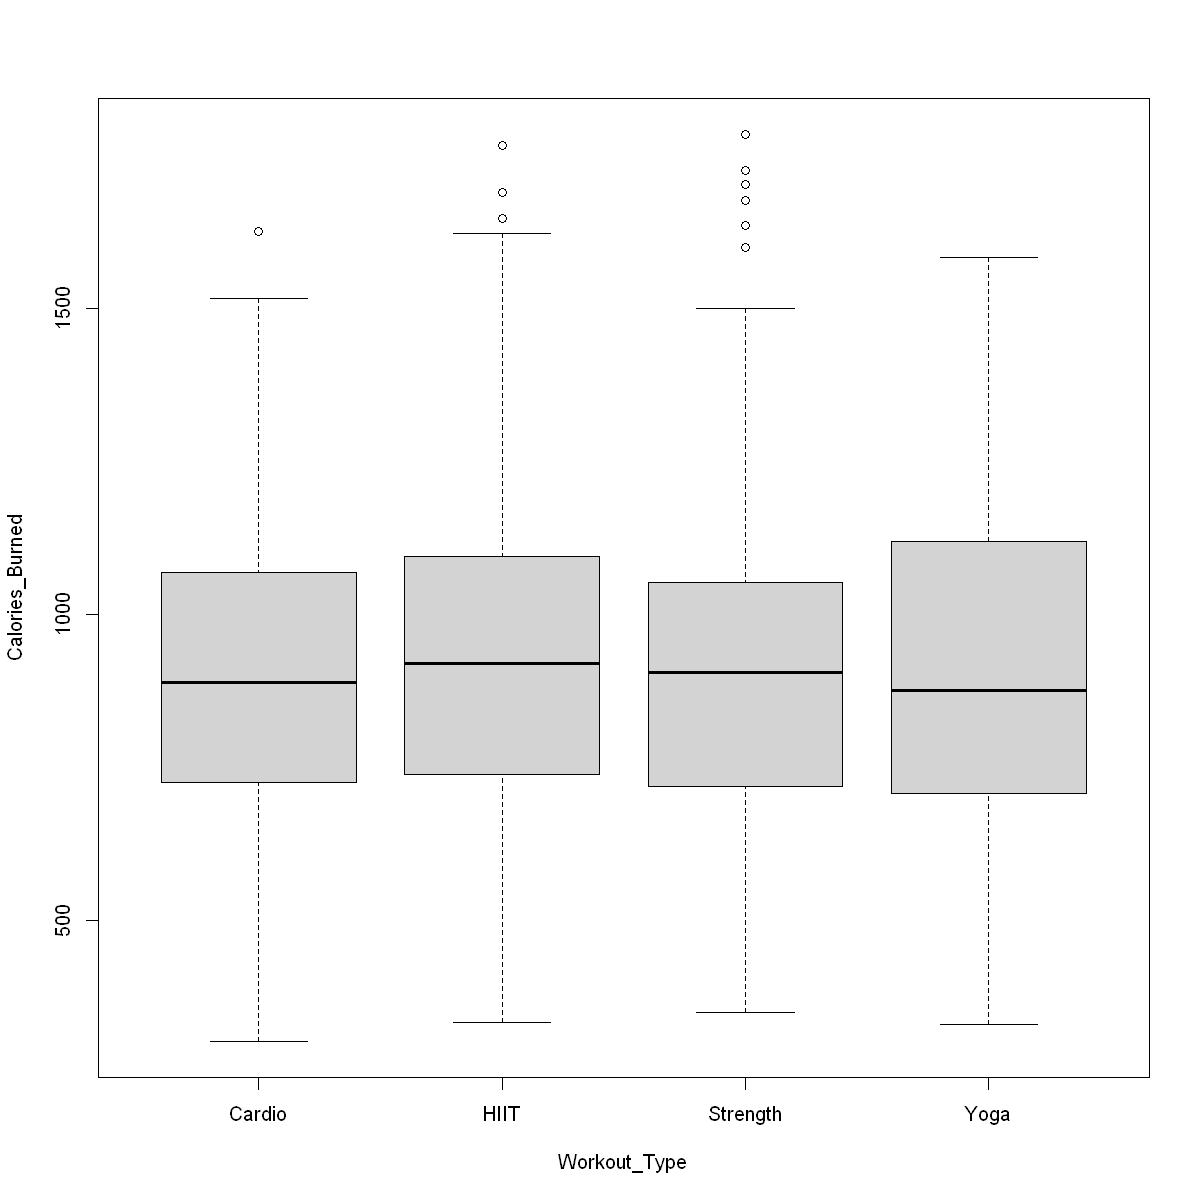

In [142]:
boxplot(Calories_Burned ~ Workout_Type, data = gym)

Comment l'interpréter : 
- Si les médianes diffèrent beaucoup → possible effet de la quali sur la quanti.
- Si les boîtes sont très différentes en forme ou en taille → distributions différentes (hétérogénéité).

On peut aussi faire un violin plot qui est une extension du boxplot qui montre aussi la densité des données

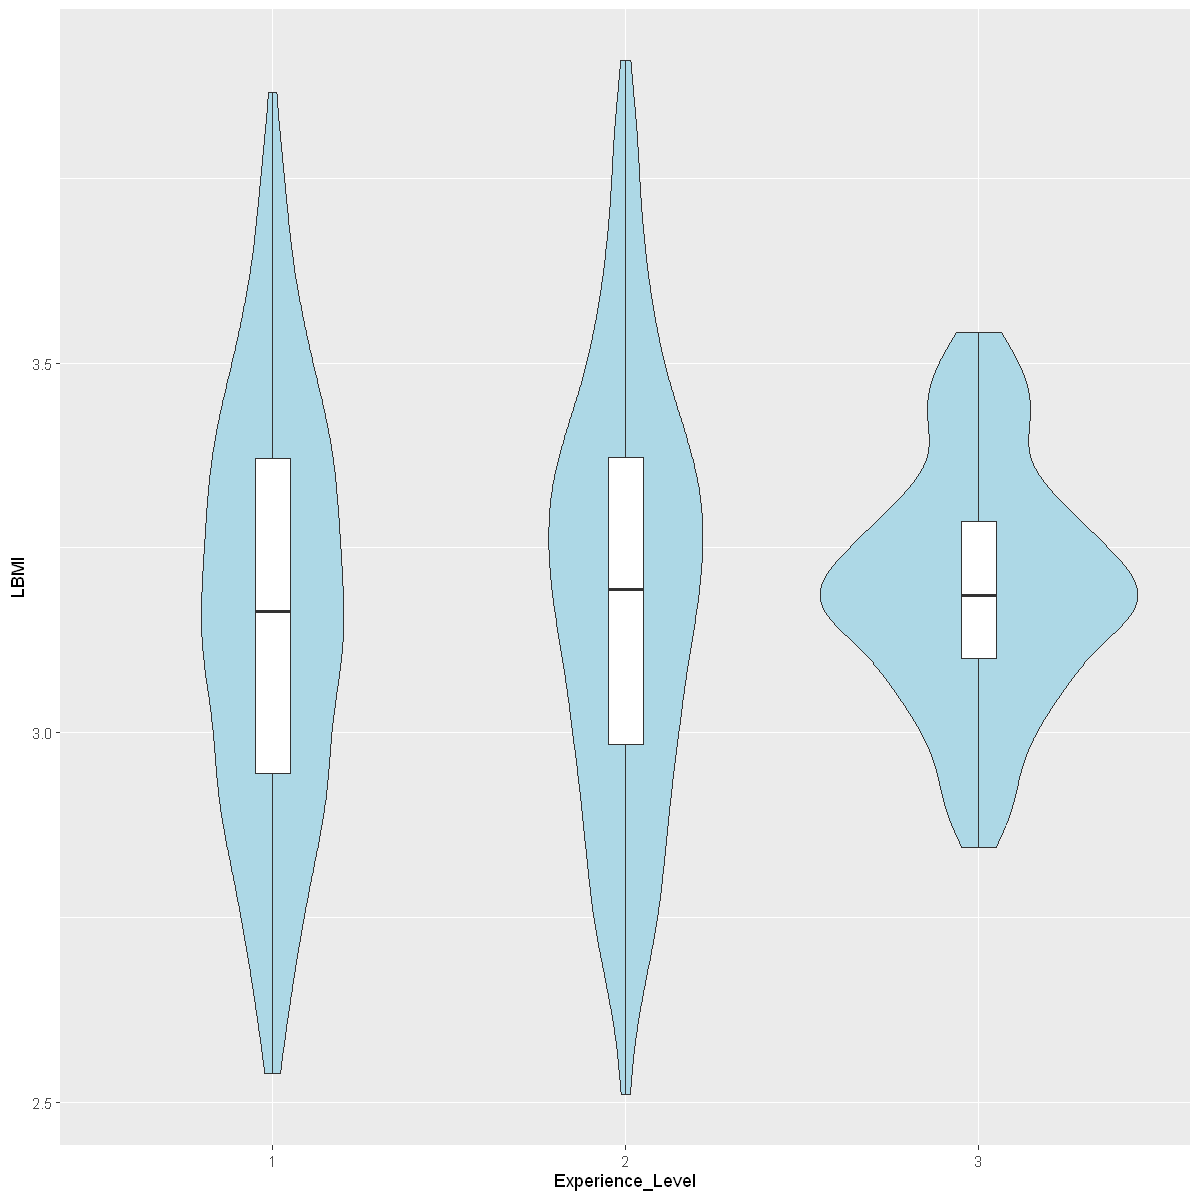

In [143]:
ggplot(gym, aes(x = Experience_Level, y = LBMI)) +
  geom_violin(fill = "lightblue") + geom_boxplot(width = 0.1)

Comment l'interpréter : 
- idem que pour les boxplots 
- Les zones plus larges montrent où les données sont plus concentrées
- on peut voir si les distributions sont symétriques ou biaisées, ou s’il y a des pics multiples

On peut aussi afficher les moyennes et écarts-types par groupe afin de résumer numériquement la distribution de la variable quantitative pour chaque modalité de la variable qualitative.

In [144]:
aggregate(Calories_Burned ~ Experience_Level, data = gym, FUN = function(x) c(mean = mean(x), sd = sd(x)))


Experience_Level,Calories_Burned
<fct>,"<dbl[,2]>"
1,"726.3750, 227.3433"
2,"901.9187, 152.6454"
3,"1265.3403, 186.8345"


Comment l'interpréter : 
- Si les moyennes sont très différentes → effet probable du facteur.
- Si les écarts-types varient → variance inégale entre groupes (important à noter pour choisir les tests).

In [146]:
#Pour la partie quanti / quali j'ai pas eu le temps de tester beaucoup de trucs j'ai juste mis les 3 tests les plus intéressants à faire.
#Par contre pour les autres comparaisons, tous les tests importants ont été faits et toutes les variables ont été passées en revu.